<h1 style='color:red'> Data Science Project: Predicting Home Prices in Bangalore </h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

<h2 style='color:blue'>Loading Bangalore dataset into a dataframe</h2>

In [3]:
df_house_price = pd.read_csv("F:/Work/GitHUB/Python_for_data_science/Bengaluru_House_Data.csv")
df_house_price.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df_house_price.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

<h2 style='color:blue'>Cleaning the dataset</h2>


In [5]:
# drop "area_type", "avialbility", "balcony" and "society" from the dataset to make the model simple
df_house_price_1 = df_house_price.drop(["area_type", "availability", "society", "balcony"], axis=1)
df_house_price_1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [6]:
df_house_price_1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df_house_price_3 = df_house_price_1.dropna()
df_house_price_3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df_house_price_3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

<h2 style='color:blue'>Feature Engineering</h2>

Add new feature for BHK

In [9]:
# cleaning the "size" column
df_house_price_3['bhk'] = df_house_price_3['size'].apply(lambda x: int(x.split(' ')[0]))
df_house_price_3.head()

C:\Users\Lab\AppData\Local\Temp\ipykernel_6748\3340694248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_price_3['bhk'] = df_house_price_3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df_house_price_3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
df_house_price_3['total_sqft'].unique() # existance of range: 1133 - 1384

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Exploring total_sqft feature

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
# finding the rows that require corrections
df_house_price_3[~df_house_price_3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. These cases are dropped from dataset to keep things simple.

In [14]:
# converting the range --> take the two nunmbers and give the average
def convert_range(x):
    nums = x.split('-')
    if len(nums) == 2:
        return (float(nums[0])+float(nums[1]))/2
    try:
        return float(x)
    except:
        return None   

In [41]:
df_house_price_4 = df_house_price_3.copy() # deep copying te dataframe
df_house_price_4['total_sqft'] = df_house_price_4['total_sqft'].apply(convert_range)
df_house_price_4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [42]:
df_house_price_4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

<h2 style='color:blue'>Feature Engineering</h2>

Add new feature called "price per square feet"

In [43]:
df_house_price_5 = df_house_price_4.copy()
# Creating a new feature "price_per_sqft" --> it is more relevant in the market
df_house_price_5['price_per_sqft'] = df_house_price_5['price']*100000/df_house_price_5['total_sqft']
df_house_price_5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [65]:
df5_stats = df_house_price_5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

<h2 style='color:blue'>Dimensionality Reduction</h2>


Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [66]:
# Finding the data points based on the location
df_house_price_5.location = df_house_price_5.location.apply(lambda x: x.strip())
location_stats = df_house_price_5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [67]:
len(location_stats[location_stats<=10])

1052

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount.

In [68]:
# creating a filter for extracting the locations with less than 10 observations
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [69]:
len(df_house_price_5.location.unique()) # original dataset have 1293 unique locations

1293

In [70]:
# Changing the locations having less than 10 observations as 'others' for simplicity
df_house_price_5.location = df_house_price_5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [71]:
len(df_house_price_5.location.unique()) # transformed dataset have only 242 unique locations

242

In [72]:
df_house_price_5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


<h2 style='color:blue'>Outlier detection and removal: Based on Business Logic</h2>

In [73]:
# typical sqft per bed room: 300 sqft
# identifyig outliers considering this assumption
df_house_price_5[df_house_price_5.total_sqft/df_house_price_5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [74]:
df_house_price_5.shape

(13246, 7)

In [75]:
# removing outliers based on 'sqft per bed room'
df_house_price_6 = df_house_price_5[~(df_house_price_5.total_sqft/df_house_price_5.bhk < 300)]
df_house_price_6.shape

(12502, 7)

<h2 style='color:blue'>Outlier detection and removal: Using Mean and Standard Deviation</h2>

In [76]:
df_house_price_6.price_per_sqft.describe()
# price --> min: 267.83 and max: 176470.59 --> Since we're building a generic model, we're not considering the extreme cases

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [77]:
# function to remove extreme cases based on standard deviation
# filtering out observations which is beyond 1 standard deviation

def remove_pps_outlier(df):
    df_output = pd.DataFrame()

    # Group the data by 'location' and process each group separately
    for key, subdf in df.groupby('location'):
        # Calculate mean and standard deviation of 'price_per_sqft' for each location group
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        
        # Filter outliers within mean ± standard deviation range for the location
        # Around 68% of the data falls within one standard deviation from the mean
        filtered_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_output = pd.concat([df_output, filtered_df], ignore_index=True)
        
    return df_output

In [78]:
# removed outliers from 'price_per_sqft'
df_house_price_7 = remove_pps_outlier(df_house_price_6)
df_house_price_7.shape


(10241, 7)

In [84]:
# See if the same location and house size is having price differences
# function to see the inconsistencies in dataset
def scatter_plot(df, location):
    # checking the 2 bhk ad 3 bhk houses of same location having logical pricer differences
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (8, 5)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

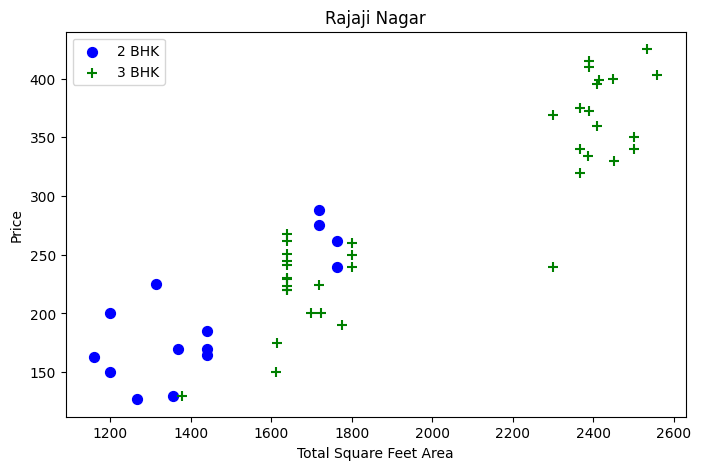

In [85]:
scatter_plot(df_house_price_7, "Rajaji Nagar")

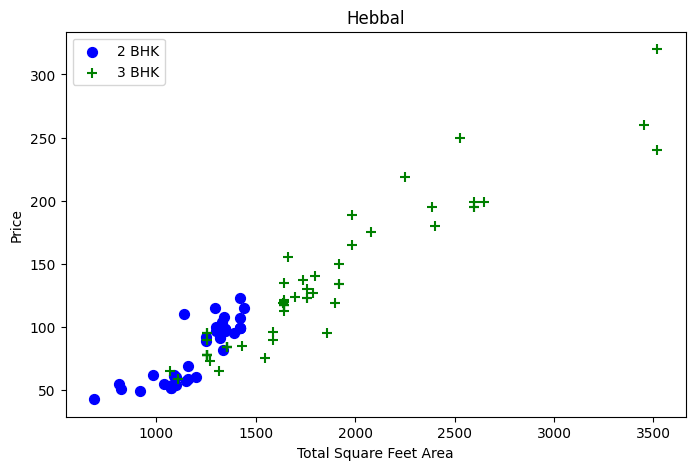

In [86]:
scatter_plot(df_house_price_7, "Hebbal")

Remove properties where for same location, the price of 3 bhk apartment is less than 2 bhk.In order to do that we build a dictionary of stats per bhk. --> We use the logic that 3 bhk apartments will have the price per sqft more than th mean price per sqft of the 2 bhk apartment.

{
    '1': {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    '2': {
        'mean': 4500,
        'std': 2400,
        'count': 30
    }
}

In [80]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df_house_price_8 = remove_bhk_outliers(df_house_price_7)
df_house_price_8.shape

(7329, 7)

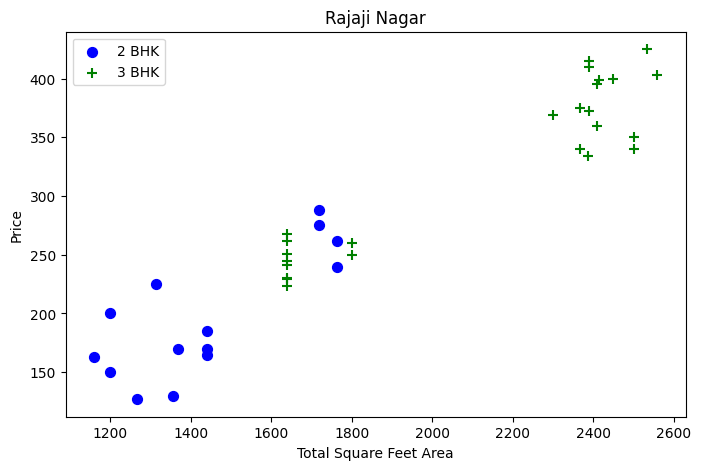

In [81]:
scatter_plot(df_house_price_8, "Rajaji Nagar")

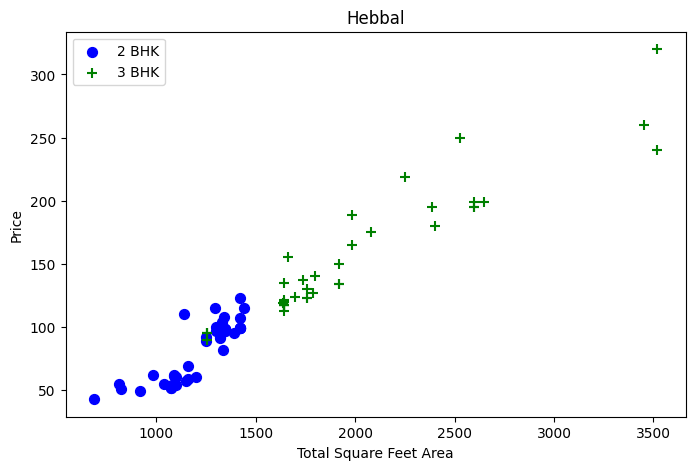

In [82]:
scatter_plot(df_house_price_8, "Hebbal")

Text(0, 0.5, 'Count')

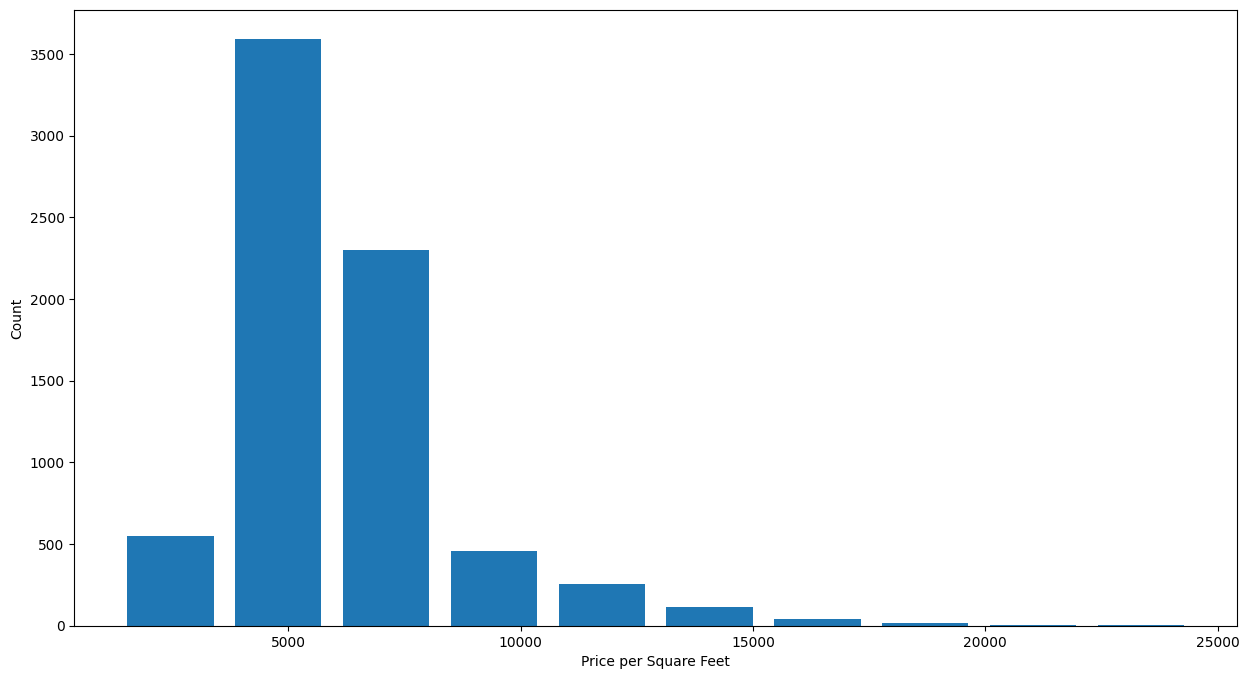

In [54]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15, 8)
plt.hist(df_house_price_8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")

<h2 style='color:blue'>Outlier detection and removal: Using Bathroom Features</h2>

In [57]:
df_house_price_8.bath.unique()
# It is unusual to have 2 more bathrooms than number of bedrooms in a home

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [87]:
df_house_price_8[df_house_price_8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

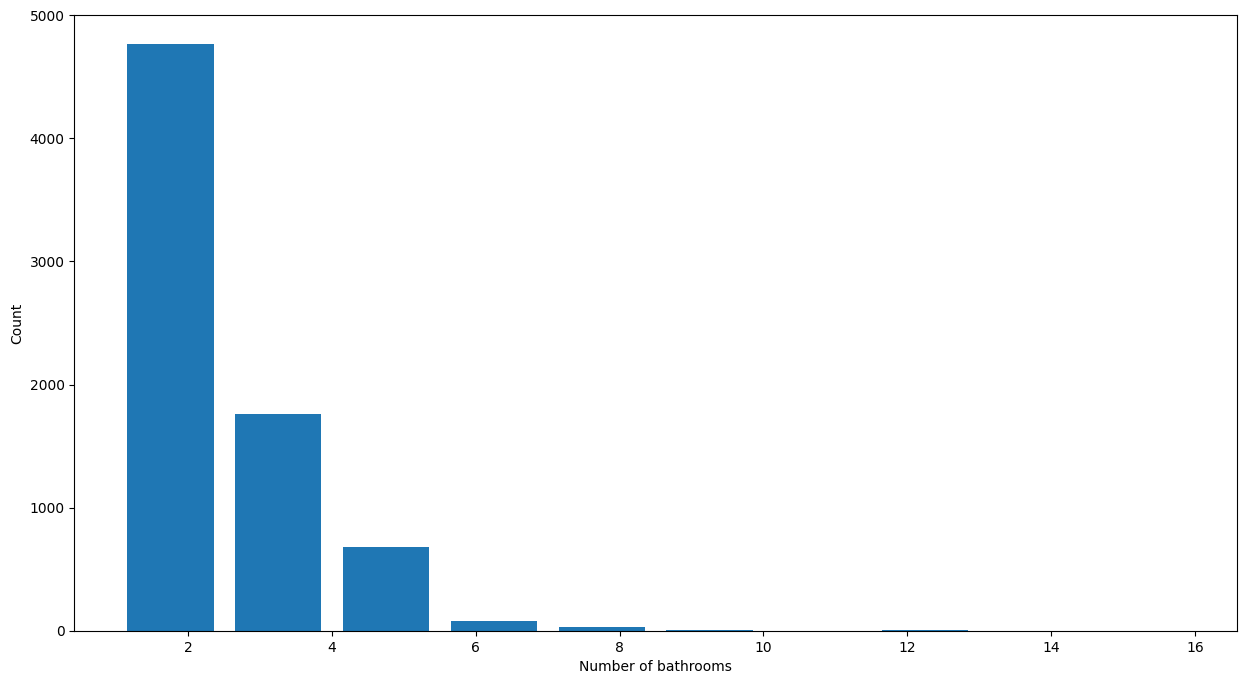

In [56]:
plt.hist(df_house_price_8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [88]:
df_house_price_8[df_house_price_8.bath > df_house_price_8.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed.

In [89]:
df_house_price_9 = df_house_price_8[df_house_price_8.bath < df_house_price_8.bhk + 2]
df_house_price_9.shape

(7251, 7)

In [90]:
df_house_price_9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [91]:
df_house_price_10 = df_house_price_9.drop(['size','price_per_sqft'],axis='columns')
df_house_price_10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


<h2 style='color:blue'>One Hot Encoding for Location</h2>